In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel('27_jan_data_v4.xlsx')

In [ ]:
df

,Дата,Брендовые запросы,Брендовые запросы мин,Брендовые запросы по всем конкурентам,Брендовые запросы по ТОП-5 конкурентам,"Брендовые запросы по конкурентам, кроме ТОП-5",Категорийные запросы,Число заболевших,Индекс самоизоляции,GRP (44-),GRP (44+),GRP (all),Рабочие дни / Праздники,пн,вт,ср,чт,пт,сб,Новый Год 2016-17,Новый Год 2017-18,Новый Год 2018-19,Новый Год 2019-20,Гос. Праздники,Гос.праздники + НГ,PI,МП,Рекламные показы Яндекса (перформ),Рекламные клики Яндекса (перформ),Прямые переходы,Переходы из социальных сетей,Переходы из поисковых систем→Google,Переходы из поисковых систем→Яндекс,Рекламные показы Google (SEM),Рекламные клики Google (SEM),Рекламные показы Yandex (SEM),Рекламные клики Yandex (SEM),Рекламные показы соц.сети (MyTarget),Рекламные клики соц.сети (MyTarget),Рекламные показы соц.сети (Vkontakte),Рекламные клики соц.сети (Vkontakte),Рекламные показы Яндекса (перформ) Логин 1,Рекламные показы Яндекса (перформ) Логин 2,Рекламные показы Яндекса (перформ) Логин 3,Рекламные клики Яндекса (перформ) Логин 1,Рекламные клики Яндекса (перформ) Логин 2,Рекламные клики Яндекса (перформ) Логин 3,Показы в соц сетях
0,2017-01-01,307,66,6317,2211,4106,2251,0,0.000000,0.0000,0.0000,0.0000,1,0,0,0,0,0,0,1,0,0,0,0,1,76.71,56,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0.0,0,0,0
1,2017-01-02,545,304,9442,3300,6142,3671,0,0.000000,6.6547,26.9306,19.8482,1,1,0,0,0,0,0,1,0,0,0,0,1,76.71,56,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0.0,0,0,0
2,2017-01-03,539,298,10623,3753,6870,3828,0,0.000000,4.1708,29.6534,12.4055,1,0,1,0,0,0,0,1,0,0,0,0,1,76.71,56,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0.0,0,0,0
3,2017-01-04,659,418,11425,3985,7440,3943,0,0.000000,9.6493,25.2185,22.7902,1,0,0,1,0,0,0,1,0,0,0,0,1,76.71,56,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0.0,0,0,0
4,2017-01-05,589,348,11618,3997,7621,3446,0,0.000000,5.0436,21.3563,15.4025,1,0,0,0,1,0,0,1,0,0,0,0,1,76.71,56,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1425,2020-11-26,1073,832,29361,9453,19908,9373,2187990,1.269894,2.4140,17.5274,8.4833,0,0,0,0,1,0,0,0,0,0,0,0,0,68.96,60,5254.0,295.0,70,371,30,9,2873,280,5254,295,214195,321,85667,176,0.0,0,5254,0.0,0,295,299862
1426,2020-11-27,1000,759,27749,9146,18603,9069,2215533,1.231560,4.1805,27.4131,18.6018,0,0,0,0,0,1,0,0,0,0,0,0,0,68.96,60,4284.0,264.0,66,399,17,9,2896,320,4284,264,207395,327,80090,182,0.0,0,4284,0.0,0,264,287485
1427,2020-11-28,867,626,25391,8563,16828,8504,2242633,2.406267,1.8878,17.7674,7.1460,1,0,0,0,0,0,1,0,0,0,0,0,0,68.96,60,3422.0,198.0,39,417,26,5,2703,303,3422,198,219933,351,86025,207,0.0,0,3422,0.0,0,198,305958
1428,2020-11-29,838,597,25451,8556,16895,8288,2269316,2.898297,3.2323,10.3463,11.1237,1,0,0,0,0,0,0,0,0,0,0,0,0,68.96,60,3889.0,207.0,47,430,27,3,2476,264,3889,207,220999,334,95355,203,0.0,0,3889,0.0,0,207,316354


In [ ]:
import numpy as np
def adstock(data, rate):
    tt = np.empty(len(data))
    tt[0] = data[0]

    for i in range(1, len(data)):
      tt[i] = data[i] + tt[i-1] * rate
    return tt



In [ ]:
df.columns

Index(['Дата', 'Брендовые запросы', 'Брендовые запросы мин',
       'Брендовые запросы по всем конкурентам',
       'Брендовые запросы по ТОП-5 конкурентам',
       'Брендовые запросы по конкурентам, кроме ТОП-5', 'Категорийные запросы',
       'Число заболевших', 'Индекс самоизоляции', 'GRP (44-)', 'GRP (44+)',
       'GRP (all)', 'Рабочие дни / Праздники', 'пн', 'вт', 'ср', 'чт', 'пт',
       'сб', 'Новый Год 2016-17', 'Новый Год 2017-18', 'Новый Год 2018-19',
       'Новый Год 2019-20', 'Гос. Праздники', 'Гос.праздники + НГ', 'PI', 'МП',
       'Рекламные показы Яндекса (перформ)',
       'Рекламные клики Яндекса (перформ)', 'Прямые переходы',
       'Переходы из социальных сетей', 'Переходы из поисковых систем→Google',
       'Переходы из поисковых систем→Яндекс', 'Рекламные показы Google (SEM)',
       'Рекламные клики Google (SEM)', 'Рекламные показы Yandex (SEM)',
       'Рекламные клики Yandex (SEM)', 'Рекламные показы соц.сети (MyTarget)',
       'Рекламные клики соц.сети (MyT

In [ ]:
Y = df['Брендовые запросы']

In [ ]:
X = df[['Брендовые запросы по всем конкурентам','Категорийные запросы', 'Число заболевших', 'GRP (44-)', 'GRP (44+)','Рабочие дни / Праздники', 'МП',  
        'Рекламные показы Яндекса (перформ)', 'Рекламные показы Google (SEM)','Показы в соц сетях']]

In [ ]:
X

,Брендовые запросы по всем конкурентам,Категорийные запросы,Число заболевших,GRP (44-),GRP (44+),Рабочие дни / Праздники,МП,Рекламные показы Яндекса (перформ),Рекламные показы Google (SEM),Показы в соц сетях
0,6317,2251,0,0.0000,0.0000,1,56,0.0,0,0
1,9442,3671,0,6.6547,26.9306,1,56,0.0,0,0
2,10623,3828,0,4.1708,29.6534,1,56,0.0,0,0
3,11425,3943,0,9.6493,25.2185,1,56,0.0,0,0
4,11618,3446,0,5.0436,21.3563,1,56,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
1425,29361,9373,2187990,2.4140,17.5274,0,60,5254.0,2873,299862
1426,27749,9069,2215533,4.1805,27.4131,0,60,4284.0,2896,287485
1427,25391,8504,2242633,1.8878,17.7674,1,60,3422.0,2703,305958
1428,25451,8288,2269316,3.2323,10.3463,1,60,3889.0,2476,316354


In [ ]:
X[['Рекламные показы Google (SEM)']]

,Рекламные показы Google (SEM)
0,0
1,0
2,0
3,0
4,0
...,...
1425,2873
1426,2896
1427,2703
1428,2476


In [ ]:
x1 = adstock(X['Рекламные показы Google (SEM)'], 0.5)
x1

array([   0.        ,    0.        ,    0.        , ..., 5530.59058724,
       5241.29529362, 5427.64764681])

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
pd.DataFrame(x1)

,0
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
1425,5518.362349
1426,5655.181174
1427,5530.590587
1428,5241.295294


In [ ]:
df_ad = pd.DataFrame(x1).join(X)


Index([                                      0,
       'Брендовые запросы по всем конкурентам',
                        'Категорийные запросы',
                            'Число заболевших',
                                   'GRP (44-)',
                                   'GRP (44+)',
                     'Рабочие дни / Праздники',
                                          'МП',
          'Рекламные показы Яндекса (перформ)',
               'Рекламные показы Google (SEM)',
                          'Показы в соц сетях'],
      dtype='object')

In [ ]:
names = [                                   'Рекламные показы Google (SEM)',
       'Брендовые запросы по всем конкурентам',
                        'Категорийные запросы',
                            'Число заболевших',
                                   'GRP (44-)',
                                   'GRP (44+)',
                     'Рабочие дни / Праздники',
                                          'МП',
          'Рекламные показы Яндекса (перформ)',
               'Рекламные показы Google (SEM)',
                          'Показы в соц сетях']

In [ ]:
df_ad.rename(columns={'0': 'Рекламные показы Google (SEM)'}, inplace=True)

In [ ]:
x1[0]

0.0

In [ ]:
for i in range (len(df_ad)):
  df_ad.loc[i, 'Рекламные показы Google (SEM)'] = x1[i]
df_ad

,0,Брендовые запросы по всем конкурентам,Категорийные запросы,Число заболевших,GRP (44-),GRP (44+),Рабочие дни / Праздники,МП,Рекламные показы Яндекса (перформ),Рекламные показы Google (SEM),Показы в соц сетях
0,0.000000,6317,2251,0,0.0000,0.0000,1,56,0.0,0.000000,0
1,0.000000,9442,3671,0,6.6547,26.9306,1,56,0.0,0.000000,0
2,0.000000,10623,3828,0,4.1708,29.6534,1,56,0.0,0.000000,0
3,0.000000,11425,3943,0,9.6493,25.2185,1,56,0.0,0.000000,0
4,0.000000,11618,3446,0,5.0436,21.3563,1,56,0.0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
1425,5518.362349,29361,9373,2187990,2.4140,17.5274,0,60,5254.0,5518.362349,299862
1426,5655.181174,27749,9069,2215533,4.1805,27.4131,0,60,4284.0,5655.181174,287485
1427,5530.590587,25391,8504,2242633,1.8878,17.7674,1,60,3422.0,5530.590587,305958
1428,5241.295294,25451,8288,2269316,3.2323,10.3463,1,60,3889.0,5241.295294,316354


In [ ]:
df_ad.columns

Index([                                      0,
       'Брендовые запросы по всем конкурентам',
                        'Категорийные запросы',
                            'Число заболевших',
                                   'GRP (44-)',
                                   'GRP (44+)',
                     'Рабочие дни / Праздники',
                                          'МП',
          'Рекламные показы Яндекса (перформ)',
               'Рекламные показы Google (SEM)',
                          'Показы в соц сетях'],
      dtype='object')

In [ ]:
df_ans = df_ad[[ 'Брендовые запросы по всем конкурентам',
                        'Категорийные запросы',
                            'Число заболевших',
                                   'GRP (44-)',
                                   'GRP (44+)',
                     'Рабочие дни / Праздники',
                                          'МП',
          'Рекламные показы Яндекса (перформ)',
               'Рекламные показы Google (SEM)',
                          'Показы в соц сетях']]
df_ans

,Брендовые запросы по всем конкурентам,Категорийные запросы,Число заболевших,GRP (44-),GRP (44+),Рабочие дни / Праздники,МП,Рекламные показы Яндекса (перформ),Рекламные показы Google (SEM),Показы в соц сетях
0,6317,2251,0,0.0000,0.0000,1,56,0.0,0.000000,0
1,9442,3671,0,6.6547,26.9306,1,56,0.0,0.000000,0
2,10623,3828,0,4.1708,29.6534,1,56,0.0,0.000000,0
3,11425,3943,0,9.6493,25.2185,1,56,0.0,0.000000,0
4,11618,3446,0,5.0436,21.3563,1,56,0.0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...
1425,29361,9373,2187990,2.4140,17.5274,0,60,5254.0,5518.362349,299862
1426,27749,9069,2215533,4.1805,27.4131,0,60,4284.0,5655.181174,287485
1427,25391,8504,2242633,1.8878,17.7674,1,60,3422.0,5530.590587,305958
1428,25451,8288,2269316,3.2323,10.3463,1,60,3889.0,5241.295294,316354


In [ ]:
lm = LinearRegression()
lm = lm.fit(df_ans,Y)
coefficients = pd.concat([pd.DataFrame(df_ans.columns),pd.DataFrame(np.transpose(lm.coef_))], axis = 1)
lm.intercept_

40.48388660698458

In [ ]:
coefficients

,0,0
0,Брендовые запросы по всем конкурентам,0.027224
1,Категорийные запросы,0.006645
2,Число заболевших,0.000021
3,GRP (44-),15.794154
4,GRP (44+),1.429082
5,Рабочие дни / Праздники,-15.305620
6,МП,0.813707
7,Рекламные показы Яндекса (перформ),0.000174
8,Рекламные показы Google (SEM),-0.005507
9,Показы в соц сетях,-0.000135


In [ ]:
print(lm.summary())

AttributeError: ignored

In [ ]:
lm.score()

TypeError: ignored

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats


X2 = sm.add_constant(df_ans)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:      Брендовые запросы   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     508.2
Date:                Wed, 27 Jan 2021   Prob (F-statistic):               0.00
Time:                        22:16:15   Log-Likelihood:                -8121.6
No. Observations:                1430   AIC:                         1.627e+04
Df Residuals:                    1419   BIC:                         1.632e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [ ]:
!streamlit run app.py

/bin/bash: streamlit: command not found


## Пробник

In [13]:
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn.metrics as metrics


# Считывание данных

In [15]:
df = pd.read_excel('/content/27_jan_data_v4.xlsx')

In [4]:
df.head(1)

,Дата,Брендовые запросы,Брендовые запросы мин,Брендовые запросы по всем конкурентам,Брендовые запросы по ТОП-5 конкурентам,"Брендовые запросы по конкурентам, кроме ТОП-5",Категорийные запросы,Число заболевших,Индекс самоизоляции,GRP (44-),GRP (44+),GRP (all),Рабочие дни / Праздники,пн,вт,ср,чт,пт,сб,Новый Год 2016-17,Новый Год 2017-18,Новый Год 2018-19,Новый Год 2019-20,Гос. Праздники,Гос.праздники + НГ,PI,МП,Рекламные показы Яндекса (перформ),Рекламные клики Яндекса (перформ),Прямые переходы,Переходы из социальных сетей,Переходы из поисковых систем→Google,Переходы из поисковых систем→Яндекс,Рекламные показы Google (SEM),Рекламные клики Google (SEM),Рекламные показы Yandex (SEM),Рекламные клики Yandex (SEM),Рекламные показы соц.сети (MyTarget),Рекламные клики соц.сети (MyTarget),Рекламные показы соц.сети (Vkontakte),Рекламные клики соц.сети (Vkontakte),Рекламные показы Яндекса (перформ) Логин 1,Рекламные показы Яндекса (перформ) Логин 2,Рекламные показы Яндекса (перформ) Логин 3,Рекламные клики Яндекса (перформ) Логин 1,Рекламные клики Яндекса (перформ) Логин 2,Рекламные клики Яндекса (перформ) Логин 3,Показы в соц сетях
0,2017-01-01,307,66,6317,2211,4106,2251,0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,1,0,0,0,0,1,76.71,56,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0.0,0,0,0


# Выбор целевой переменной и факторов

In [5]:
df.columns

Index(['Дата', 'Брендовые запросы', 'Брендовые запросы мин',
       'Брендовые запросы по всем конкурентам',
       'Брендовые запросы по ТОП-5 конкурентам',
       'Брендовые запросы по конкурентам, кроме ТОП-5', 'Категорийные запросы',
       'Число заболевших', 'Индекс самоизоляции', 'GRP (44-)', 'GRP (44+)',
       'GRP (all)', 'Рабочие дни / Праздники', 'пн', 'вт', 'ср', 'чт', 'пт',
       'сб', 'Новый Год 2016-17', 'Новый Год 2017-18', 'Новый Год 2018-19',
       'Новый Год 2019-20', 'Гос. Праздники', 'Гос.праздники + НГ', 'PI', 'МП',
       'Рекламные показы Яндекса (перформ)',
       'Рекламные клики Яндекса (перформ)', 'Прямые переходы',
       'Переходы из социальных сетей', 'Переходы из поисковых систем→Google',
       'Переходы из поисковых систем→Яндекс', 'Рекламные показы Google (SEM)',
       'Рекламные клики Google (SEM)', 'Рекламные показы Yandex (SEM)',
       'Рекламные клики Yandex (SEM)', 'Рекламные показы соц.сети (MyTarget)',
       'Рекламные клики соц.сети (MyT

In [16]:
Y = df['Брендовые запросы']

In [18]:
X = df[[
        #'Брендовые запросы', 'Брендовые запросы мин',
       #'Брендовые запросы по всем конкурентам',
        'Брендовые запросы по ТОП-5 конкурентам',
        #'Брендовые запросы по конкурентам, кроме ТОП-5', 
        #'Категорийные запросы',
        #'Число заболевших', 
        #'Индекс самоизоляции', 
       # 'GRP (44-)', 
        #'GRP (44+)',
        #'GRP (all)', 
       # 'Рабочие дни / Праздники', 
        #'пн', 'вт', 'ср', 'чт', 'пт','сб', 
        #'Новый Год 2016-17', 'Новый Год 2017-18', 'Новый Год 2018-19',
        #'Новый Год 2019-20', 
        # 'Гос. Праздники', 
        #'Гос.праздники + НГ', 
        #'PI', 
       # 'МП',
       #'Рекламные показы Яндекса (перформ)',
       #'Рекламные клики Яндекса (перформ)', 
        #'Прямые переходы',
       #'Переходы из социальных сетей', 
        #'Переходы из поисковых систем→Google',
       #'Переходы из поисковых систем→Яндекс', 
       # 'Рекламные показы Google (SEM)',
       'Рекламные клики Google (SEM)', 
        #'Рекламные показы Yandex (SEM)',
       #'Рекламные клики Yandex (SEM)', 
        #'Рекламные показы соц.сети (MyTarget)',
       #'Рекламные клики соц.сети (MyTarget)',
       #'Рекламные показы соц.сети (Vkontakte)',
      # 'Рекламные клики соц.сети (Vkontakte)',
       #'Рекламные показы Яндекса (перформ) Логин 1',
      # 'Рекламные показы Яндекса (перформ) Логин 2',
      # 'Рекламные показы Яндекса (перформ) Логин 3',
      # 'Рекламные клики Яндекса (перформ) Логин 1',
      # 'Рекламные клики Яндекса (перформ) Логин 2',
      # 'Рекламные клики Яндекса (перформ) Логин 3', 
      #'Показы в соц сетях'
      ]]

# Матрица корреляций

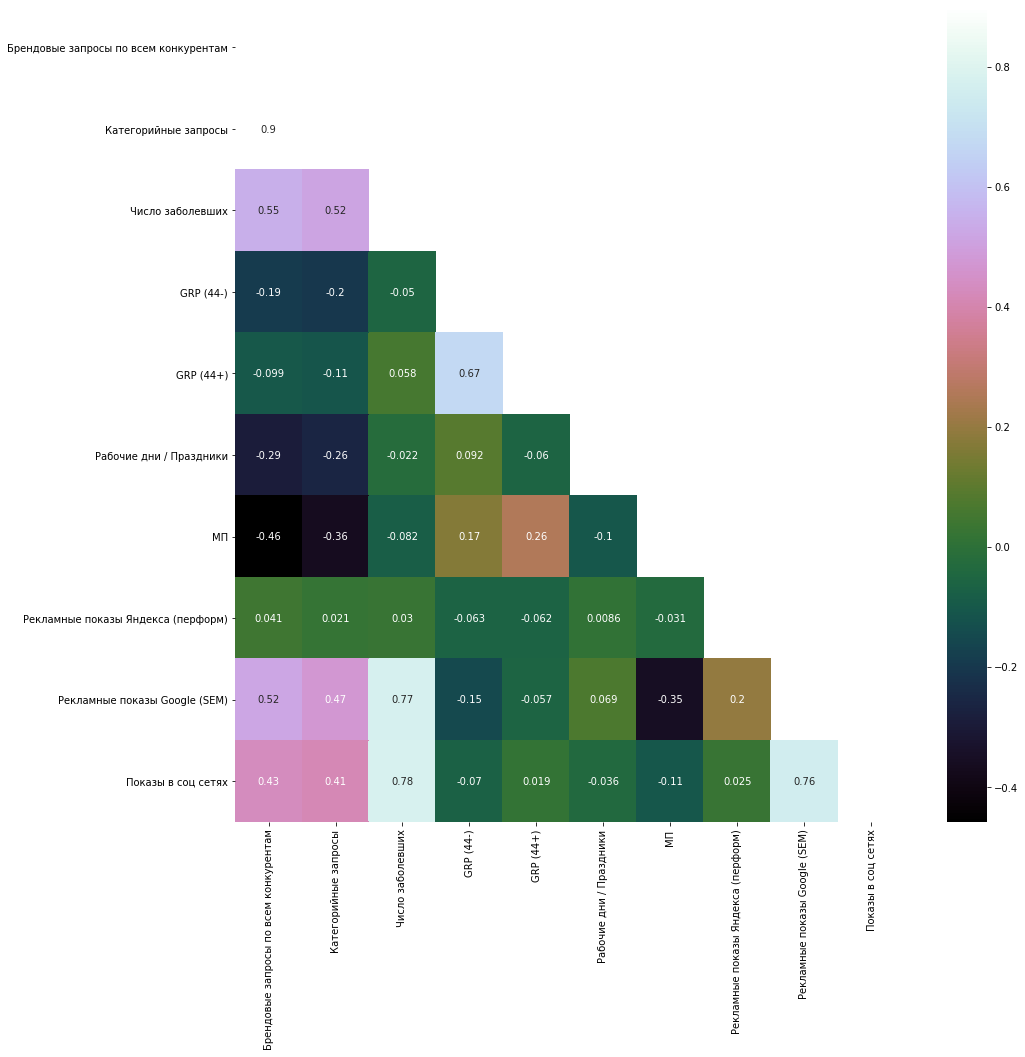

In [8]:
matrix = np.triu(X.corr())
plt.figure(figsize=(15,15))
sns.heatmap(X.corr(), annot=True, mask=matrix, cmap='cubehelix')

## Добавляем AddStock

In [9]:
import numpy as np
def adstock(data, rate):
    tt = np.empty(len(data))
    tt[0] = data[0]

    for i in range(1, len(data)):
      tt[i] = data[i] + tt[i-1] * rate
    return tt

In [10]:
X.columns

Index(['Брендовые запросы по всем конкурентам', 'Категорийные запросы',
       'Число заболевших', 'GRP (44-)', 'GRP (44+)', 'Рабочие дни / Праздники',
       'МП', 'Рекламные показы Яндекса (перформ)',
       'Рекламные показы Google (SEM)', 'Показы в соц сетях'],
      dtype='object')

In [11]:
#x1 = adstock(X['Брендовые запросы по всем конкурентам'], 0.5)
#x2 = adstock(X['Категорийные запросы'], 0.5)
#x3 = adstock(X['Число заболевших'], 0.5)
#x4 = adstock(X['GRP (44+)'], 0.5)
#x5 = adstock(X['МП'], 0.5)
#x6 = adstock(X['Рекламные показы Яндекса (перформ)'], 0.5)
x7 = pd.DataFrame(adstock(X['Рекламные показы Google (SEM)'], 0.5), columns=['Рекламные показы Google (SEM) ad'] )
#x8 = adstock(X['Показы в соц сетях'], 0.5)

# Diminition return

In [19]:
def hill_transform(x, ec, slope):
    return 1 / (1 + (x / ec)**(-slope))

<function matplotlib.pyplot.legend>

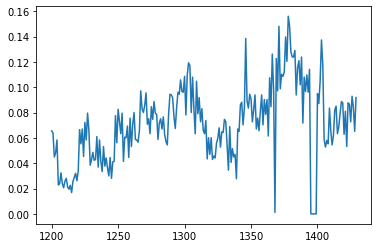

In [42]:
#plt.plot(X['Рекламные клики Google (SEM)'][1200:])
plt.plot(hill_transform(X['Рекламные клики Google (SEM)'][1200:], 1000, 2))
plt.legend

In [27]:
hill_transform(X['Рекламные клики Google (SEM)'], 0.5, 1)

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
1425    0.998217
1426    0.998440
1427    0.998353
1428    0.998110
1429    0.998430
Name: Рекламные клики Google (SEM), Length: 1430, dtype: float64

In [20]:
#x1 = adstock(X['Брендовые запросы по всем конкурентам'], 0.5)
#x2 = adstock(X['Категорийные запросы'], 0.5)
#x3 = adstock(X['Число заболевших'], 0.5)
#x4 = adstock(X['GRP (44+)'], 0.5)
#x5 = adstock(X['МП'], 0.5)
#x6 = adstock(X['Рекламные показы Яндекса (перформ)'], 0.5)
x7 = pd.DataFrame(hill_transform(X['Рекламные клики Google (SEM)'], 0.5, 1.0), columns=['Рекламные показы Google (SEM) ad'] )
#x8 = adstock(X['Показы в соц сетях'], 0.5)

In [26]:
x7

,Рекламные показы Google (SEM) ad


# Новый датасет

In [24]:
df_new = X[['Брендовые запросы по ТОП-5 конкурентам',
            #'Брендовые запросы по всем конкурентам'
#, 'Категорийные запросы',
      # 'Число заболевших', 'GRP (44-)', 'GRP (44+)', 'Рабочие дни / Праздники',
       #'МП', 'Рекламные показы Яндекса (перформ)',
      # 'Показы в соц сетях'
]]
      

In [25]:
df_new = df_new.join(pd.DataFrame(x7))
df_new.head(1)

,Брендовые запросы по ТОП-5 конкурентам,Рекламные показы Google (SEM) ad
0,2211,NaN


# Моделирование 

In [16]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm = lm.fit(df_new,Y)
coefficients = pd.concat([pd.DataFrame(df_new.columns),pd.DataFrame(np.transpose(lm.coef_))], axis = 1)
lm.intercept_

40.483886606980604

In [17]:
coefficients

,0,0
0,Брендовые запросы по всем конкурентам,0.027224
1,Категорийные запросы,0.006645
2,Число заболевших,0.000021
3,GRP (44-),15.794154
4,GRP (44+),1.429082
5,Рабочие дни / Праздники,-15.305620
6,МП,0.813707
7,Рекламные показы Яндекса (перформ),0.000174
8,Показы в соц сетях,-0.000135
9,Рекламные показы Google (SEM) ad,-0.005507


In [19]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(df_new)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:      Брендовые запросы   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     508.2
Date:                Thu, 28 Jan 2021   Prob (F-statistic):               0.00
Time:                        07:19:33   Log-Likelihood:                -8121.6
No. Observations:                1430   AIC:                         1.627e+04
Df Residuals:                    1419   BIC:                         1.632e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

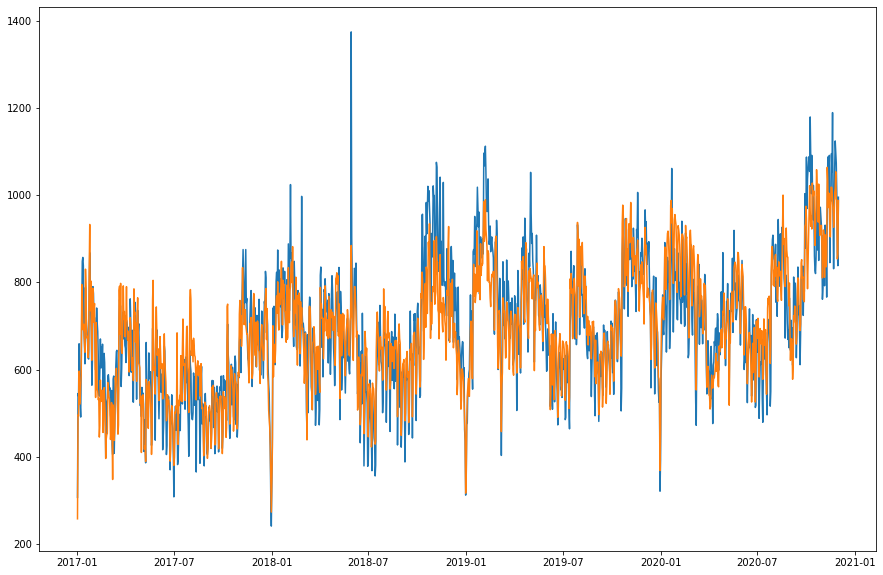

In [20]:
plt.figure(figsize=(15,10))
plt.plot(df['Дата'],Y)
plt.plot(df['Дата'],lm.predict(df_new))

# Метрики

In [21]:
yhat = lm.predict(df_new)
mae = metrics.mean_absolute_error(Y, yhat)
mse = metrics.mean_squared_error(Y, yhat)
rmse = np.sqrt(mse) # or mse**(0.5) 
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100 
r2 = metrics.r2_score(Y,yhat)


print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print(round(mean_absolute_percentage_error(Y, yhat),2), '%')
print("R-Squared:", r2)


Results of sklearn.metrics:
MAE: 55.057555134923476
MSE: 5018.962130222443
RMSE: 70.84463374330086
8.01 %
R-Squared: 0.7817201032636825


# Пробую виджет

In [44]:
import ipywidgets as widgets

In [96]:
title = widgets.HTML(value='<h1>Regression</h1>', layout={'padding': '0 0 0 50px'})
w0_slider = widgets.FloatSlider(min=0, max=1.0, step=0.1) 
w0_ui = widgets.HBox([
    widgets.Label(value='$$w_0$$'), 
    w0_slider
])
sliders_ui = widgets.VBox([w0_ui], layout={'margin':'10px 100px 10px 10px'})

equation_output = widgets.Label(
    value=r'$$f(x)=w_0 \times x+w_1 \times x^2 + sin(w_2 \times x)$$', 
    layout={
        'width': '60%', 
        'height': '60%'
    })
weights_ui = widgets.HBox([sliders_ui, equation_output])

plot_output = widgets.Output()

ui = widgets.VBox([title, weights_ui, plot_output], layout={'border':'1px solid black'})

# build events
def update_plot(ev):
    plot_output.clear_output(wait=True)
    with plot_output:
        X_reg = np.linspace(xmin, xmax, 100).astype(np.float)
        y_reg = np.polynomial.polynomial.polyval(X_reg, [0, w0_slider.value, w1_slider.value]) + np.sin(w2_slider.value * X_reg)
        plt.plot(X_data, y_data, "+", X_reg, y_reg)
        plt.title('Manual regression')
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.show()

# wire events together
w0_slider.observe(update_plot, names='value')
w1_slider.observe(update_plot, names='value')
w2_slider.observe(update_plot, names='value')
update_plot(None) # initialize widget

display(ui)

NameError: ignored

In [51]:
title
w0_slider
w0_ui

# Понеслась


In [89]:
d = pd.read_excel('/content/27_jan_data_v4.xlsx')
Y = d['Брендовые запросы']
df = d[['Брендовые запросы по всем конкурентам','Категорийные запросы','Число заболевших', 'GRP (44-)', 'GRP (44+)', 'Рабочие дни / Праздники',
        'МП', 'Рекламные показы Яндекса (перформ)', 'Рекламные показы Google (SEM)', 'Показы в соц сетях' ]]


In [95]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats


def adstock(data, rate):
    tt = np.empty(len(data))
    tt[0] = data[0]

    for i in range(1, len(data)):
      tt[i] = data[i] + tt[i-1] * rate
    return tt

title = widgets.HTML(value='<h1>Регрессия - моя профессия</h1>', layout={'padding': '0 0 0 50px'})

#w1_slider = widgets.FloatSlider(min=0, max=1.0, step=0.1) 

num_s = len(df)
li = []

for i in range (num_s):
  'w_slider' + str(i) = widgets.FloatSlider(min=0, max=1.0, step=0.1) 
  w_ui + str(i) = widgets.HBox([
    widgets.Label(value='Adstock'), 
    w_slider + str(i)])
  li.append(w_slider + str(i))

sliders_ui = widgets.VBox(li, layout={'margin':'10px 100px 10px 10px'})

weights_ui = widgets.HBox([sliders_ui])

plot_output = widgets.Output()

ui = widgets.VBox([title, weights_ui,  plot_output], layout={'border':'1px solid black'})


# build events
def update_plot(ev):
  plot_output.clear_output(wait=True)
  with plot_output:
    for name in df.columns:
      i = 0
      w_name_cur = 'w_slider' + str(i)
      df[name] = pd.DataFrame(adstock(df[name], w_name_cur.value), columns=[name])
    
    
    #x7 = pd.DataFrame(adstock(d['Брендовые запросы по всем конкурентам'], w_slider.value), columns=['Брендовые запросы по всем конкурентам'] )
    #df_new = df.join(pd.DataFrame(x7))
    X2 = sm.add_constant(df)
    #X2 = sm.add_constant(df_new)
    est = sm.OLS(Y, X2)
    est2 = est.fit()
    print(est2.summary())

for i in range (0 ,len(df.columns)):  
  w_f_cur = 'w_slider' + str(i)    
  w_f_cur.observe(update_plot, names='value')
#w_slider.observe(update_plot, names='value')

update_plot(None) # initialize widget

display(ui)

#x7 = pd.DataFrame(adstock(d['Брендовые запросы по всем конкурентам'], w_ui), columns=['Брендовые запросы по всем конкурентам'] )

SyntaxError: ignored

In [78]:
weights_ui = widgets.HBox([sliders_ui])

In [113]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
import ipywidgets as widgets

d = pd.read_excel('/content/27_jan_data_v4.xlsx')
Y = d['Брендовые запросы']
df = d[['Брендовые запросы по всем конкурентам','Категорийные запросы','Число заболевших', 'GRP (44-)', 'GRP (44+)', 'Рабочие дни / Праздники',
        'МП', 'Рекламные показы Яндекса (перформ)', 'Рекламные показы Google (SEM)', 'Показы в соц сетях' ]]



def adstock(data, rate):
    tt = np.empty(len(data))
    tt[0] = data[0]

    for i in range(1, len(data)):
      tt[i] = data[i] + tt[i-1] * rate
    return tt

title = widgets.HTML(value='<h1>Регрессия - моя профессия</h1>', layout={'padding': '0 0 0 50px'})

w1_slider = widgets.FloatSlider(min=0, max=1.0, step=0.01) 
w2_slider = widgets.FloatSlider(min=0, max=1.0, step=0.01) 
w3_slider = widgets.FloatSlider(min=0, max=1.0, step=0.01) 
w4_slider = widgets.FloatSlider(min=0, max=1.0, step=0.01) 
w5_slider = widgets.FloatSlider(min=0, max=1.0, step=0.01) 
w6_slider = widgets.FloatSlider(min=0, max=1.0, step=0.01) 
w7_slider = widgets.FloatSlider(min=0, max=1.0, step=0.01) 
w8_slider = widgets.FloatSlider(min=0, max=1.0, step=0.01) 
w9_slider = widgets.FloatSlider(min=0, max=1.0, step=0.01) 
w10_slider = widgets.FloatSlider(min=0, max=1.0, step=0.01) 

w1_ui = widgets.HBox([widgets.Label(value=df.columns[0]), w1_slider])
w2_ui = widgets.HBox([widgets.Label(value=df.columns[1]), w2_slider])
w3_ui = widgets.HBox([widgets.Label(value=df.columns[2]), w3_slider])
w4_ui = widgets.HBox([widgets.Label(value=df.columns[3]), w4_slider])
w5_ui = widgets.HBox([widgets.Label(value=df.columns[4]), w5_slider])
w6_ui = widgets.HBox([widgets.Label(value=df.columns[5]), w6_slider])
w7_ui = widgets.HBox([widgets.Label(value=df.columns[6]), w7_slider])
w8_ui = widgets.HBox([widgets.Label(value=df.columns[7]), w8_slider])
w9_ui = widgets.HBox([widgets.Label(value=df.columns[8]), w9_slider])
w10_ui = widgets.HBox([widgets.Label(value=df.columns[9]),w10_slider])

sliders_ui = widgets.VBox([w1_ui, w2_ui, w3_ui, w4_ui, w5_ui, w6_ui,w7_ui, w8_ui, w9_ui, w10_ui], layout={'margin':'10px 100px 10px 10px'})

weights_ui = widgets.HBox([sliders_ui])

plot_output = widgets.Output()

ui = widgets.VBox([title, weights_ui, plot_output], layout={'border':'1px solid black'})


# build events
def update_plot(ev):
  plot_output.clear_output(wait=True)
  with plot_output:
  
    df['Брендовые запросы по всем конкурентам'] = pd.DataFrame(adstock(df['Брендовые запросы по всем конкурентам'], w1_slider.value), columns=['Брендовые запросы по всем конкурентам'] )
    df['Категорийные запросы'] = pd.DataFrame(adstock(df['Категорийные запросы'], w2_slider.value), columns=['Категорийные запросы'] )
    df['Число заболевших'] = pd.DataFrame(adstock(df['Число заболевших'], w3_slider.value), columns=['Число заболевших'] )
    df['GRP (44-)'] = pd.DataFrame(adstock(df['GRP (44-)'], w4_slider.value), columns=['GRP (44-)'] )
    df['GRP (44+)'] = pd.DataFrame(adstock(df['GRP (44+)'], w5_slider.value), columns=['GRP (44+)'] )
    df['Рабочие дни / Праздники'] = pd.DataFrame(adstock(df['Рабочие дни / Праздники'], w6_slider.value), columns=['Рабочие дни / Праздники'] )
    df['МП'] = pd.DataFrame(adstock(df['МП'], w7_slider.value), columns=['МП'] )
    df['Рекламные показы Яндекса (перформ)'] = pd.DataFrame(adstock(df['Рекламные показы Яндекса (перформ)'], w8_slider.value), columns=['Рекламные показы Яндекса (перформ)'] )
    df['Рекламные показы Google (SEM)'] = pd.DataFrame(adstock(df['Рекламные показы Google (SEM)'], w9_slider.value), columns=['Рекламные показы Google (SEM)'] )
    df['Показы в соц сетях'] = pd.DataFrame(adstock(df['Показы в соц сетях'], w10_slider.value), columns=['Показы в соц сетях'] )
    
    X2 = sm.add_constant(df)
    #X2 = sm.add_constant(df_new)
    est = sm.OLS(Y, X2)
    est2 = est.fit()
    print(est2.summary())


w1_slider.observe(update_plot, names='value')
w2_slider.observe(update_plot, names='value')
w3_slider.observe(update_plot, names='value')
w4_slider.observe(update_plot, names='value')
w5_slider.observe(update_plot, names='value')
w6_slider.observe(update_plot, names='value')
w7_slider.observe(update_plot, names='value')
w8_slider.observe(update_plot, names='value')
w9_slider.observe(update_plot, names='value')
w10_slider.observe(update_plot, names='value')

update_plot(None) # initialize widget

display(ui)

